In [7]:
# 将数据从 .mat 文件加载到 numpy 数组中 并保存为 .npy 文件

from scipy.io import loadmat

precision = 0.0001

# Path to your .mat file
file_path = f'data/Burgers_{precision}.mat'

# Load the .mat file
data = loadmat(file_path)

# Explore the contents
print(data.keys())  # Shows variable names in the file

# Access a specific variable (replace 'variable_name' with the actual name)
#variable = data['variable_name']
#print(variable)
initials  = data['input']
solutions = data['output']


import os
import numpy as np

save_directory = os.path.join(os.getcwd(), 'data')
file_name = f'burgers_solutions_{precision}_101.npy'
# Define the file path
file_path = os.path.join(save_directory, file_name)
# Save the random functions to the file
np.save(file_path, solutions)
print(f'solution file saved to: {file_path}')

file_name = f'burgers_initials_{precision}_101.npy'
# Define the file path
file_path = os.path.join(save_directory, file_name)
# Save the random functions to the file
np.save(file_path, initials)
print(f'initial file saved to: {file_path}')

dict_keys(['__header__', '__version__', '__globals__', 'gamma', 'input', 'output', 'sigma', 'tau', 'tspan'])


Solutions loaded from: /qfs/people/weiz828/DON/data/burgers_solutions_0.0001_101.npy


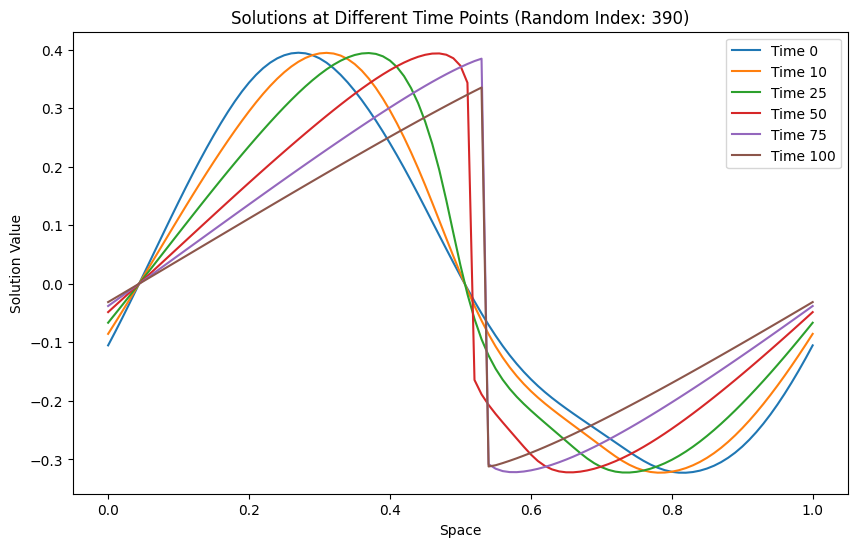

In [14]:
# 将 numpy 数组加载到内存中并绘制随机函数
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_random_solution(precision, time_points):
    """
    Plot a random function from the solutions data set at specified time points.

    Parameters:
    - precision: The precision value used in the file names.
    - time_points: List of time points to plot.
    """
    # Define the save directory and file path
    save_directory = os.path.join(os.getcwd(), 'data')
    file_name = f'burgers_solutions_{precision}_101.npy'
    file_path = os.path.join(save_directory, file_name)

    # Load the solutions array
    solutions = np.load(file_path)
    print(f'Solutions loaded from: {file_path}')

    # Pick a random index from the solutions array
    random_index = np.random.randint(solutions.shape[0])

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the solutions at the specified time points
    for t in time_points:
        ax.plot(np.linspace(0, 1, 101), solutions[random_index, t, :], label=f'Time {t}')

    # Add labels and title
    ax.set_xlabel('Space')
    ax.set_ylabel('Solution Value')
    ax.set_title(f'Solutions at Different Time Points (Random Index: {random_index})')
    ax.legend()

    # Show the plot
    plt.show()

# Example usage
precision = 0.0001
time_points = [0, 10, 25, 50, 75, 100]
plot_random_solution(precision, time_points)